# Feature Statistics for Dissected Data

⚠️ Before running this, run `data_exploration_cleaning/dissected/dissected_pre-processing.ipynb` to retrieve new versions of dissected data.

## Libraries and Configurations

Import configuration files

In [7]:
from configparser import ConfigParser

config = ConfigParser()
config.read("../config.ini")

['../config.ini']

Import **data libraries**

In [8]:
import pandas as pd

Import **other libraries**

In [9]:
from rich.progress import Progress
from rich import traceback

traceback.install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x762c394afd90>>

Custom helper scripts

In [10]:
%cd ..
from scripts import plotHelper, encodingHelper
%cd data_exploration_cleaning

/home/bacci/COMPACT/notebooks
/home/bacci/COMPACT/notebooks/data_exploration_cleaning


## Import Data

In [11]:
# Combined dataframe
dissected_df_raw_csv = (
    config["DEFAULT"]["interim_path"] + "/dissected/balanced_dissected_df_raw.csv"
)

In [13]:
dissected_df_raw = pd.read_csv(dissected_df_raw_csv, index_col=0)

# dissected_df_raw['Timestamp'] = pd.to_datetime(dissected_df_raw['Timestamp'])
dissected_df_raw.drop(columns=["Timestamp"], inplace=True)

/tmp/ipykernel_21052/240827621.py:1: DtypeWarning: Columns (6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dissected_df_raw = pd.read_csv(dissected_df_raw_csv, index_col=0)


In [14]:
dissected_df_raw

,MAC Address,Channel,DS Channel,Vendor Specific Tags,SSID,VHT Capabilities,HE Capabilities,Length,Label,Supported Rates 1,...,Channel_Schedule_Management,Geodatabase_Inband_Enabling_Signal,Network_Channel_Control,White_Space_Map,Channel_Availability_Query,FTM_Responder,FTM_Initiator,Reserved_6,ESM_Capability,Future_Channel_Guidance
0,1a:e6:5a:fe:34:4c,1,1.0,NaN,NaN,NaN,NaN,111,iPhone7_F,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1a:e6:5a:fe:34:4c,1,1.0,NaN,NaN,NaN,NaN,111,iPhone7_F,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1a:e6:5a:fe:34:4c,11,1.0,NaN,NaN,NaN,NaN,111,iPhone7_F,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1a:e6:5a:fe:34:4c,1,2.0,NaN,NaN,NaN,NaN,111,iPhone7_F,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1a:e6:5a:fe:34:4c,11,2.0,NaN,NaN,NaN,NaN,111,iPhone7_F,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13939,da:a1:19:00:17:f9,6,1.0,0050f208002400,NaN,92719033feff8601feff8601,02000f,182,XiaomiRedmiNote7_S,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
13940,da:a1:19:1a:cc:8f,6,8.0,0050f208002400,Wind3 HUB-6D1619,92719033feff8601feff8601,020010,198,XiaomiRedmiNote7_S,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
13941,da:a1:19:41:c9:b1,11,5.0,0050f208002400,NaN,92719033feff8601feff8601,020025,143,XiaomiRedmiNote7_S,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
13942,da:a1:19:c7:24:b1,1,3.0,0050f208002400,NaN,92719033feff8601feff8601,020010,182,XiaomiRedmiNote7_S,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


List unique devices from `Label` column

In [15]:
print(dissected_df_raw["Label"].unique())

['iPhone7_F' 'iPhone12_M' 'iPhone11_C' 'iPhoneXR_L' 'OppoFindX3Neo_A'
 'S21Ultra_M' 'iPhoneXR_A' 'iPhone11_M' 'iPhone11_B' 'iPhone11_F'
 'iPhone12Pro_C' 'SamsungS7_I' 'XiaomiA2_E' 'GooglePixel3A_L'
 'OnePlusNord_O' 'GooglePixel3A_V' 'SamsungM31_A' 'iPhone12_W'
 'XiaomiRedmiNote9S_T' 'HuaweiP10_Q' 'iPhone6_N' 'iPhoneXR_U' 'iPhone7_X'
 'iPhoneXSMax_M' 'SamsungJ6_K' 'HuaweiL21_D' 'SamsungS6_H'
 'HuaweiHonor9_R' 'HuaweiP20_G' 'SamsungS4_C' 'XiaomiRedmi4_B'
 'XiaomiRedmi5_J' 'XiaomiRedmiNote7_S']


Adjust `Length`, considering `SSID`.

In [16]:
dissected_df_raw["Length"] = dissected_df_raw.apply(
    lambda row: (
        row["Length"] - len(row["SSID"])
        if isinstance(row["SSID"], str)
        else row["Length"]
    ),
    axis=1,
)

## NaN Feature Analysis

Let's put into a dataframe the percentages in which columns contain `NaN`.

In [17]:
# Calculate the sum of NaN values in each column
nan_sum = dissected_df_raw.isna().sum()

# Calculate the total number of rows
total_rows = len(dissected_df_raw)

# Calculate the percentage of NaN values in each column
nan_percentage = (nan_sum / total_rows) * 100

# Create a DataFrame to display the results
nan_df = pd.DataFrame(
    {"Column": nan_percentage.index, "Percentage of NaN": nan_percentage.values}
)

nan_df

,Column,Percentage of NaN
0,MAC Address,0.000000
1,Channel,0.000000
2,DS Channel,2.161127
3,Vendor Specific Tags,31.085280
4,SSID,82.949564
...,...,...
145,FTM_Responder,80.413916
146,FTM_Initiator,80.413916
147,Reserved_6,81.787161
148,ESM_Capability,81.787161


Now we drop the columns that have a high percentage on `NaN`, since they are not that useful to identify particular rows.

In [18]:
# Retrieving columns with more than a certain % of NaN values
threshold_nan = 50

empty_columns = nan_percentage[nan_percentage > threshold_nan].index

print(f"\nColumns with more than {threshold_nan}% NaN values:")
for column in empty_columns:
    print(f"\t - {column}")


Columns with more than 50% NaN values:
	 - SSID
	 - VHT Capabilities
	 - HE Capabilities
	 - Supported Rates 5
	 - Supported Rates 6
	 - Supported Rates 7
	 - Supported Rates 8
	 - Channel_Schedule_Management
	 - Geodatabase_Inband_Enabling_Signal
	 - Network_Channel_Control
	 - White_Space_Map
	 - Channel_Availability_Query
	 - FTM_Responder
	 - FTM_Initiator
	 - Reserved_6
	 - ESM_Capability
	 - Future_Channel_Guidance


Dropping the features that do not satisfy the threshold

In [19]:
dissected_df_raw.drop(empty_columns, axis=1, inplace=True)

## Features STD

In [20]:
dissected_df_raw_copy = dissected_df_raw.copy()
dissected_df_raw_copy.drop(
    columns=["MAC Address", "Vendor Specific Tags", "Label"], inplace=True
)
std_df = dissected_df_raw_copy.std()
std_df = pd.DataFrame({"Column": std_df.index, "Standard Deviation": std_df.values})
std_df

,Column,Standard Deviation
0,Channel,4.384973
1,DS Channel,3.959210
2,Length,27.035240
3,Supported Rates 1,24.787710
4,Supported Rates 2,24.785576
...,...,...
125,Reserved_5,0.000000
126,Protected_QLoad_Report,0.000000
127,TDLS_Wide_Bandwidth,0.000000
128,Operating_Mode_Notification,0.279489


<Axes: xlabel='Column'>

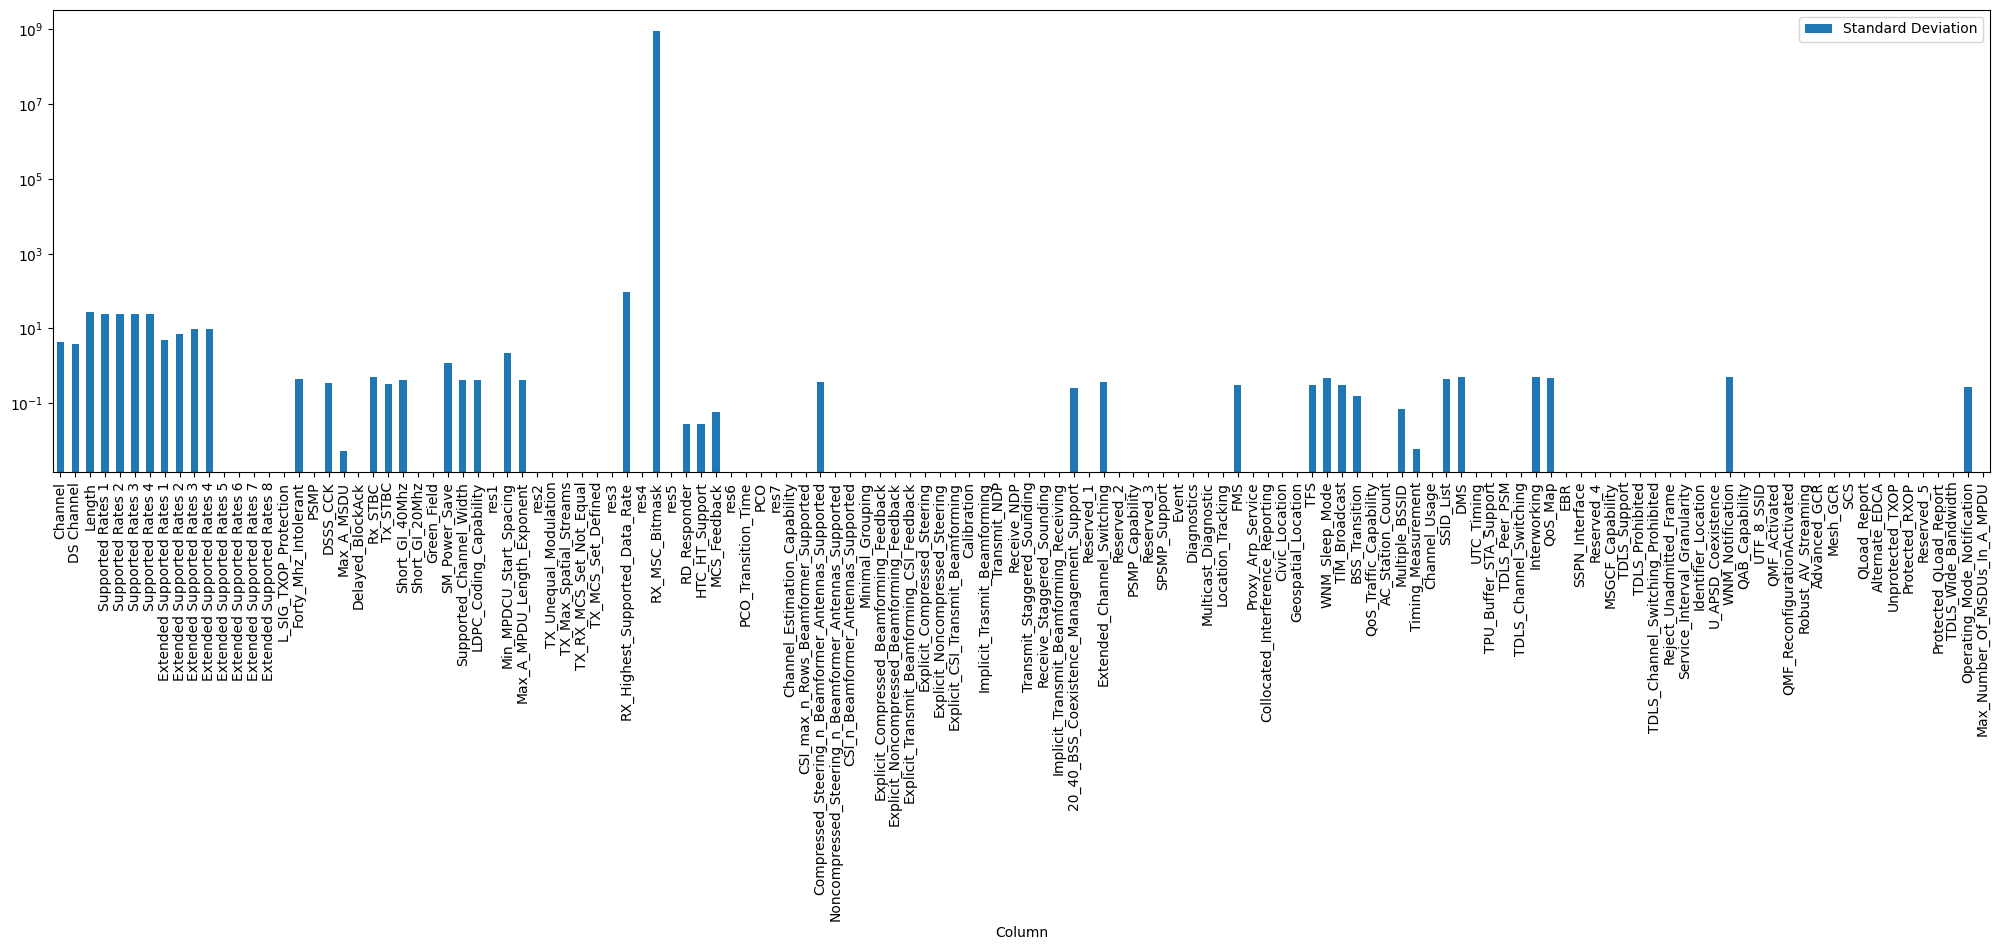

In [21]:
std_df.plot(x="Column", y="Standard Deviation", kind="bar", log=True, figsize=(25, 6))

Saving Standard Deviation of each column to CSV report.

In [22]:
# export unique_combinations to csv
reports_path = config["DEFAULT"]["reports_path"]

std_df.to_csv(reports_path + "/CSV/dissected_features/features_std.csv", index=False)

Dropping all the columns with **std=0**.

In [23]:
# Get the list of columns to drop
columns_to_drop = std_df[std_df["Standard Deviation"] == 0]["Column"].tolist()

# Drop the columns from dissected_df_raw
dissected_df_raw.drop(columns_to_drop, axis=1, inplace=True)

# Print the updated dataframe
dissected_df_raw

,MAC Address,Channel,DS Channel,Vendor Specific Tags,Length,Label,Supported Rates 1,Supported Rates 2,Supported Rates 3,Supported Rates 4,...,TIM_Broadcast,BSS_Transition,Multiple_BSSID,Timing_Measurement,SSID_List,DMS,Interworking,QoS_Map,WNM_Notification,Operating_Mode_Notification
0,1a:e6:5a:fe:34:4c,1,1.0,NaN,111,iPhone7_F,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1a:e6:5a:fe:34:4c,1,1.0,NaN,111,iPhone7_F,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1a:e6:5a:fe:34:4c,11,1.0,NaN,111,iPhone7_F,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,1a:e6:5a:fe:34:4c,1,2.0,NaN,111,iPhone7_F,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,1a:e6:5a:fe:34:4c,11,2.0,NaN,111,iPhone7_F,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13939,da:a1:19:00:17:f9,6,1.0,0050f208002400,182,XiaomiRedmiNote7_S,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
13940,da:a1:19:1a:cc:8f,6,8.0,0050f208002400,182,XiaomiRedmiNote7_S,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
13941,da:a1:19:41:c9:b1,11,5.0,0050f208002400,143,XiaomiRedmiNote7_S,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
13942,da:a1:19:c7:24:b1,1,3.0,0050f208002400,182,XiaomiRedmiNote7_S,1.0,2.0,5.5,11.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [24]:
for column in dissected_df_raw.columns:
    print(column)

MAC Address
Channel
DS Channel
Vendor Specific Tags
Length
Label
Supported Rates 1
Supported Rates 2
Supported Rates 3
Supported Rates 4
Extended Supported Rates 1
Extended Supported Rates 2
Extended Supported Rates 3
Extended Supported Rates 4
Forty_Mhz_Intolerant
DSSS_CCK
Max_A_MSDU
Rx_STBC
Tx_STBC
Short_GI_40Mhz
SM_Power_Save
Supported_Channel_Width
LDPC_Coding_Capability
Min_MPDCU_Start_Spacing
Max_A_MPDU_Length_Exponent
RX_Highest_Supported_Data_Rate
RX_MSC_Bitmask
RD_Responder
HTC_HT_Support
MCS_Feedback
Compressed_Steering_n_Beamformer_Antennas_Supported
20_40_BSS_Coexistence_Management_Support
Extended_Channel_Switching
FMS
TFS
WNM_Sleep_Mode
TIM_Broadcast
BSS_Transition
Multiple_BSSID
Timing_Measurement
SSID_List
DMS
Interworking
QoS_Map
WNM_Notification
Operating_Mode_Notification


We are left with less then a third of the features:

In [27]:
print(
    "Number of remaining features", dissected_df_raw.shape[1] - 2
)  # -2 due to Label and MAC Address columns

Number of remaining features 44
